# Latihan

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
from sklearn.model_selection import RepeatedKFold

In [2]:
def generate_dataset_simple(beta, n, std_dev):
    x = np.random.random_sample(n) * 100
    e = np.random.randn(n) * std_dev
    y = x * beta + e
    
    return x.reshape(n, 1), y

In [3]:
x, y = generate_dataset_simple(10, 50, 100)

x_train = x[:-10]
y_train = y[:-10]

x_test = x[-10:]
y_test = y[-10:]

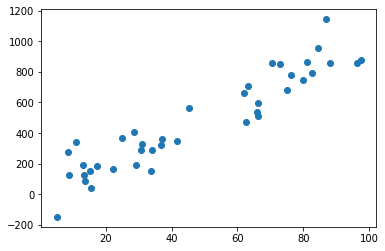

In [4]:
plt.scatter(x_train, y_train)
plt.show()

In [5]:
model = linear_model.LinearRegression()

model.fit(x_train, y_train)
print ('Coefficients: \n', model.coef_)

y_pred = model.predict(x_test)

print("Mean squared error: %.2f" % mean_squared_error (y_test, y_pred))
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Coefficients: 
 [9.92327193]
Mean squared error: 6045.89
Variance score: 0.93


NameError: name 'beta' is not defined

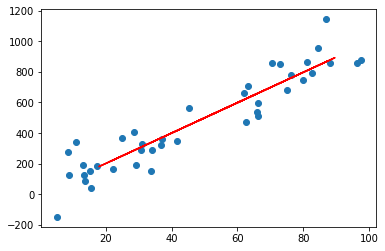

In [6]:
plt.scatter(x_train, y_train)
plt.plot(x_test, y_pred, color='red')
x_actual = np.array([0, 100])
y_actual = x_actual*beta
plt.plot(x_actual, y_actual, color='green')
plt.show()

# Tugas No 1 

In [51]:
data = pd.read_csv('dataharga.csv', sep=";").dropna()
data.index+=1
data.head(10)

,ID Barang,Nama Barang,Satuan,Harga,Rating
1,CJ16000973,Americano,1,12000,3
2,CJ21001161,Bakso Goreng,1,16000,3
3,CJ03003012,Bubble Gum Panas,1,16000,3
4,CJ03003004,Bubble Gum Susu,1,11000,3
5,CJ13001121,Bubble Gum Susu Panas,1,11000,3
6,CJ22000836,Cafe Latte,1,11000,3
7,CJ07000937,Caffe Latte Float,1,11000,3
8,CJ25001022,Cappuccino,1,11000,3
9,CJ02000912,Caramel,1,12000,3
10,CJ21001162,Chocolate Float,1,11000,3


# Tugas No 2

In [52]:
df = pd.DataFrame(data=data)
df.dtypes

ID Barang      object
Nama Barang    object
Satuan          int64
Harga           int64
Rating          int64
dtype: object

In [73]:
feature_col = ['ID Barang', 'Nama Barang', 'Satuan', 'Rating']
feature = np.array(data.Rating)
label = np.array(data.Harga)

In [74]:
KF = KFold(n_splits=5, random_state=0, shuffle=False)

for train_index, test_index in KF.split(feature):
    print("Train Index: ", train_index, "\n")
    print("Test Index: ", test_index)

Train Index:  [20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43
 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67
 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91
 92 93 94 95 96 97 98] 

Test Index:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
Train Index:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 40 41 42 43
 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67
 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91
 92 93 94 95 96 97 98] 

Test Index:  [20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Train Index:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 60 61 62 63 64 65 66 67
 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91
 92 93 94 95 96 97 98] 

Test Index:  [40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59]
T

In [75]:
lm = skl_lm.LinearRegression()
model = lm.fit(x_train, y_train)

In [76]:
print ('Coefficients: \n', model.coef_)

y_pred = model.predict(x_test)

print("Mean squared error: %.2f" % mean_squared_error (y_test, y_pred))
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Coefficients: 
 [9.94023278e-05]
Mean squared error: 0.89
Variance score: -0.54


NameError: name 'beta' is not defined

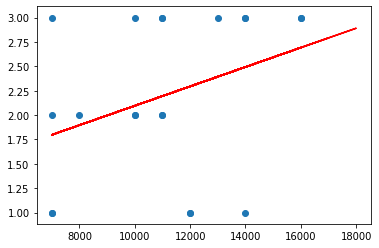

In [77]:
plt.scatter(x_train, y_train)
plt.plot(x_test, y_pred, color='red')
x_actual = np.array([0, 100])
y_actual = x_actual*beta
plt.plot(x_actual, y_actual, color='green')
plt.show()

# Tugas No 3

1. Regresi Linear merupakan salah satu dari jenis analisis peramalan atau prediksi yang sering digunakan pada data kuantitatif.
2. Prediksi harga berdasarkan rating. dihasilkan bahwa nilai rating yang tinggi diprediksi memiliki harga yang tinggi pula dan sebaliknya.rating berkisar dari 1 sampai 3. 
3. Pada percobaan yang dilakukan dengan mengimplementasikan model regresi linear maka dihasilkan Mean squared error: 0.89 dan Variance score: -0.54